In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data set 

In [7]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [8]:
df.shape

(26707, 34)

In [10]:
def null_df(data):
    nv = data.isnull().sum()
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Val':nv.values,
                          'Per_Null':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [8]:
nv_df = null_df(df)
nv_df

,Feature,Null_Val,Per_Null
15,has_health_insur,12274,45.957989
26,income_level,4423,16.561201
10,dr_recc_h1n1_vacc,2160,8.087767
11,dr_recc_seasonal_vacc,2160,8.087767
28,housing_status,2042,7.645936
29,employment,1463,5.477965
27,marital_status,1408,5.272026
23,qualification,1407,5.268282
12,chronic_medic_condition,971,3.635751
13,cont_child_undr_6_mnths,820,3.070356


### Data_ Pre _ Processing

In [13]:
df['has_health_insur'].value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

In [14]:
df['dr_recc_seasonal_vacc'].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

### Dropping Features having more than 7% null values.

In [18]:
df1 = df.copy()

In [17]:
nv_df['Feature'][nv_df['Per_Null']>7].values

array(['has_health_insur', 'income_level', 'dr_recc_h1n1_vacc',
       'dr_recc_seasonal_vacc', 'housing_status'], dtype=object)

In [19]:
df.drop(['unique_id','has_health_insur','income_level','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','housing_status'],axis=1,inplace=True)
print(df.shape)
print(df.columns)

(26707, 28)
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [21]:
nv_df = null_df(df)
nv_df

,Feature,Null_Val,Per_Null
23,employment,1463,5.477965
22,marital_status,1408,5.272026
19,qualification,1407,5.268282
9,chronic_medic_condition,971,3.635751
10,cont_child_undr_6_mnths,820,3.070356
11,is_health_worker,804,3.010447
17,sick_from_seas_vacc,537,2.010709
16,is_seas_risky,514,1.924589
15,is_seas_vacc_effective,462,1.729884
14,sick_from_h1n1_vacc,395,1.479013


In [23]:
df.dropna(inplace=True)
df.shape

(24002, 28)

In [26]:
nv_df = null_df(df)
nv_df

,Feature,Null_Val,Per_Null
0,h1n1_worry,0,0.0
1,h1n1_awareness,0,0.0
26,no_of_children,0,0.0
25,no_of_adults,0,0.0
24,census_msa,0,0.0
23,employment,0,0.0
22,marital_status,0,0.0
21,sex,0,0.0
20,race,0,0.0
19,qualification,0,0.0


 ### 2) Handling Duplicates

In [27]:
df.duplicated().sum()

22

In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Check Data Types

In [30]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
marital_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h

In [33]:
obj_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes=='object'].index


In [34]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,age_bracket,qualification,race,sex,marital_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,55 - 64 Years,< 12 Years,White,Female,Not Married,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,35 - 44 Years,12 Years,White,Male,Not Married,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,18 - 34 Years,College Graduate,White,Male,Not Married,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,65+ Years,12 Years,White,Female,Not Married,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,45 - 54 Years,Some College,White,Female,Married,Employed,"MSA, Not Principle City",1.0,0.0,0


### EDA

In [36]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [42]:
df['h1n1_vaccine'].value_counts()

0    18828
1     5152
Name: h1n1_vaccine, dtype: int64

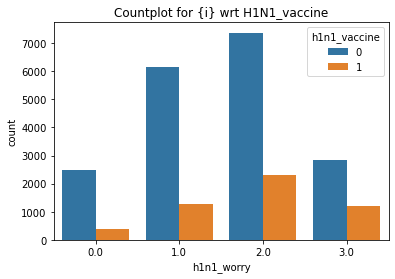

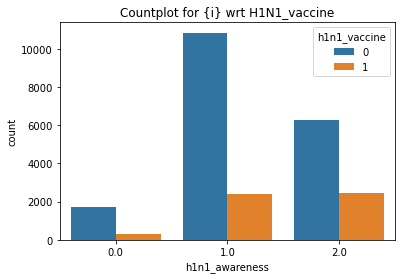

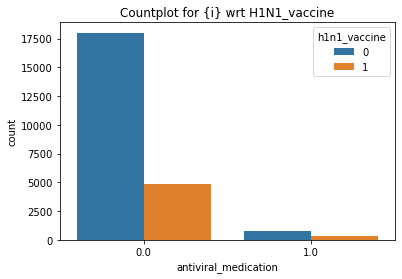

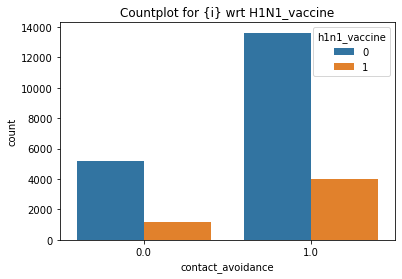

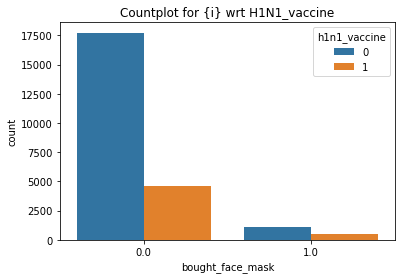

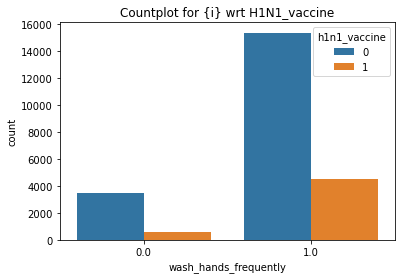

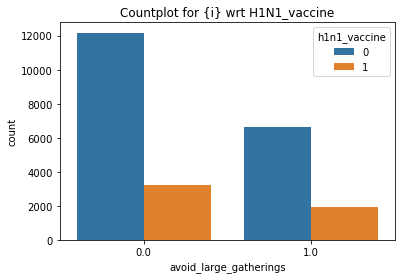

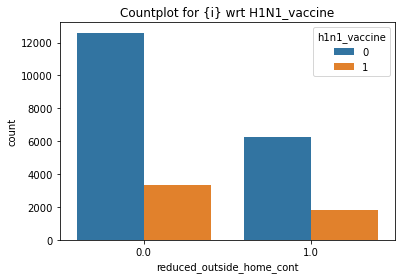

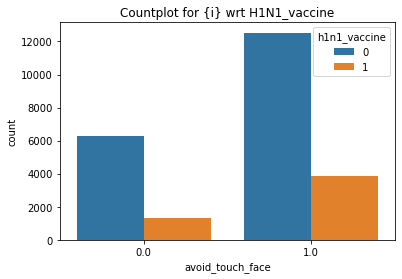

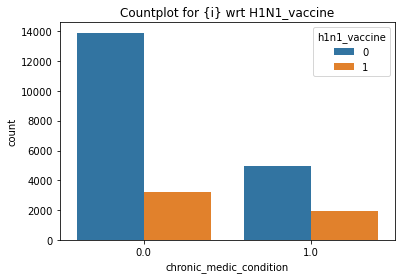

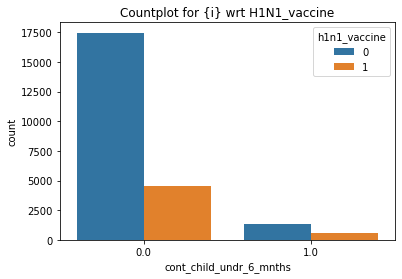

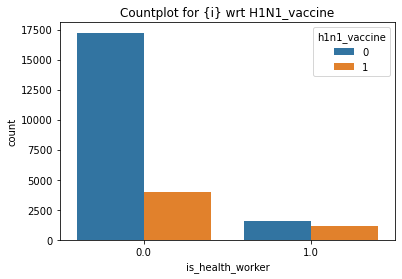

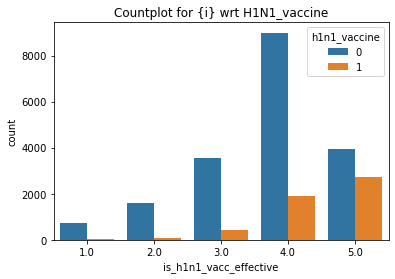

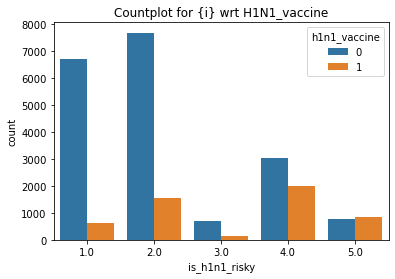

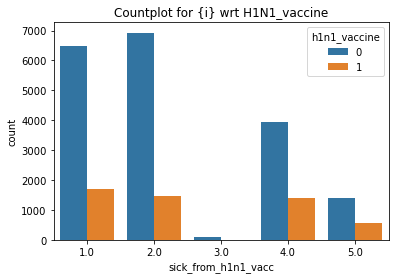

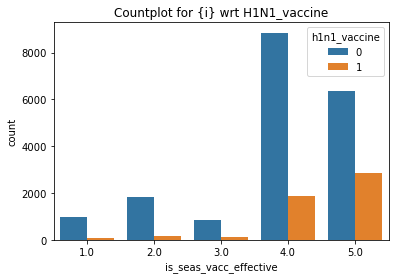

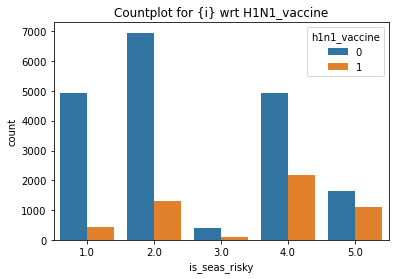

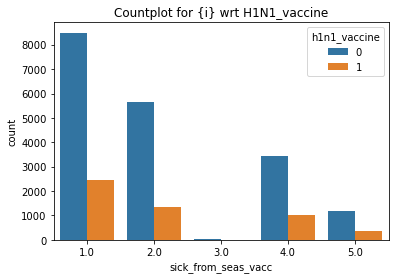

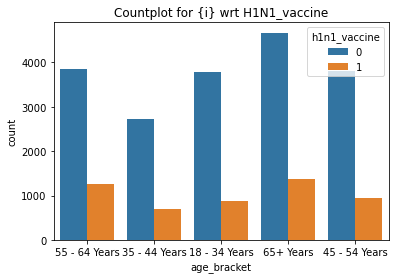

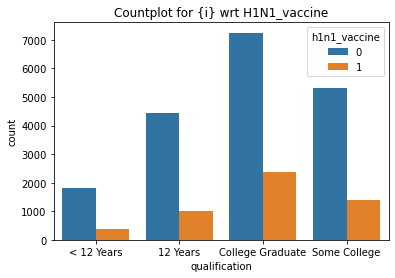

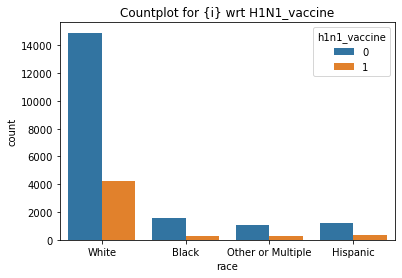

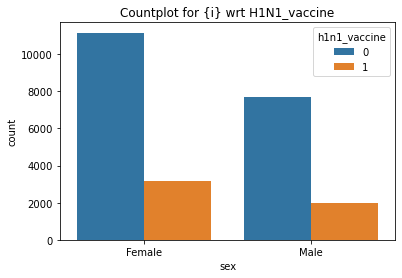

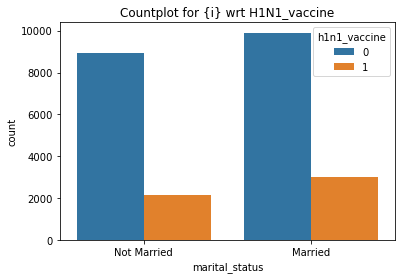

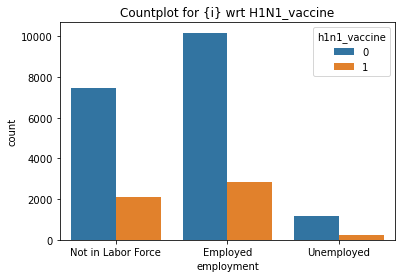

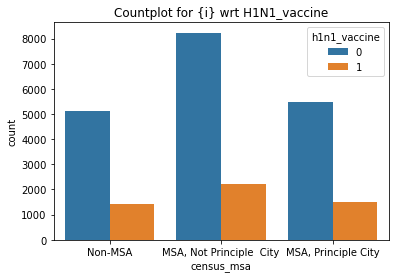

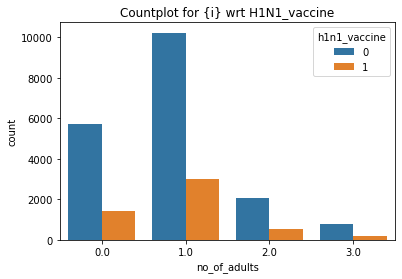

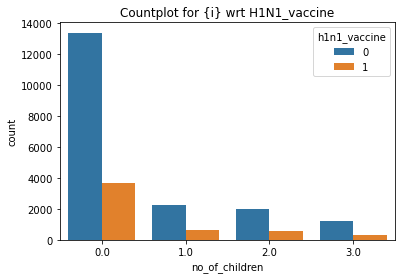

In [38]:
for i in df.columns[:-1]:
    sns.countplot(x=df[i],hue=df['h1n1_vaccine'])
    plt.title('Countplot for {i} wrt H1N1_vaccine')
    plt.show()

### Inference

1) IDs who are somewhat worried about H1N1_vaccine <br> 
2) IDs who have not taken antiviral vaccination are more likely to be Vaccinated<br>

### Checking for presence of Continous Feature

In [48]:
for i in df.columns:
    print(f 'Features {i}')
    print(f'Unique Values - {df[i].nunique()}' )
    print(f'Values Counts\n{df[i].value_counts()})

SyntaxError: invalid syntax (3358524651.py, line 2)

### Correlation

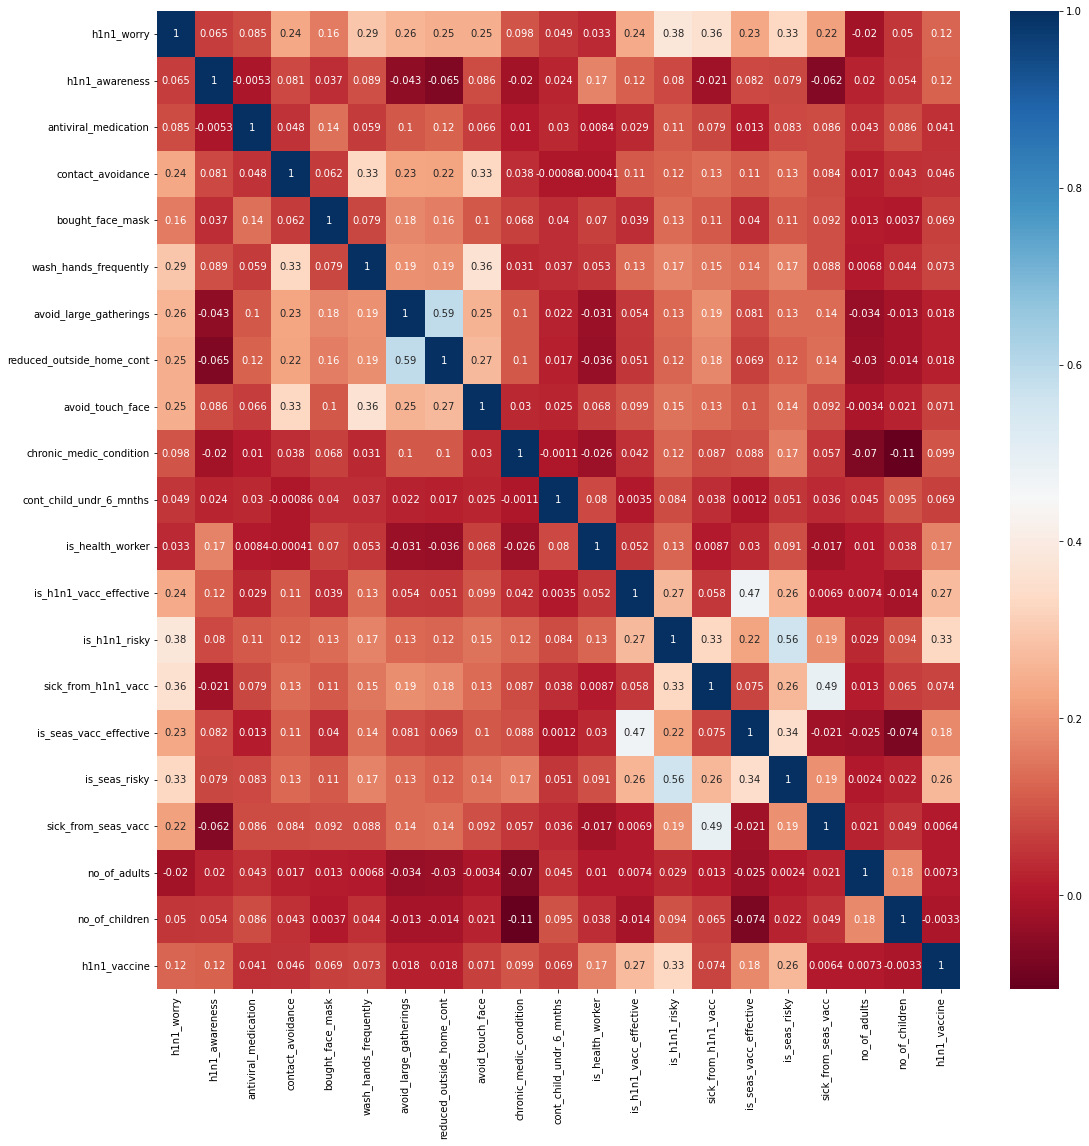

In [45]:
corr = df.corr()
plt.figure(figsize=(18,18))

sns.heatmap(corr,annot = True,cmap = 'RdBu')
plt.show()

In [49]:
x =df.dum.drop('h1n1_vaccine',axis =1)
y = df.dum['h1n1_vaccine']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

AttributeError: 'DataFrame' object has no attribute 'dum'

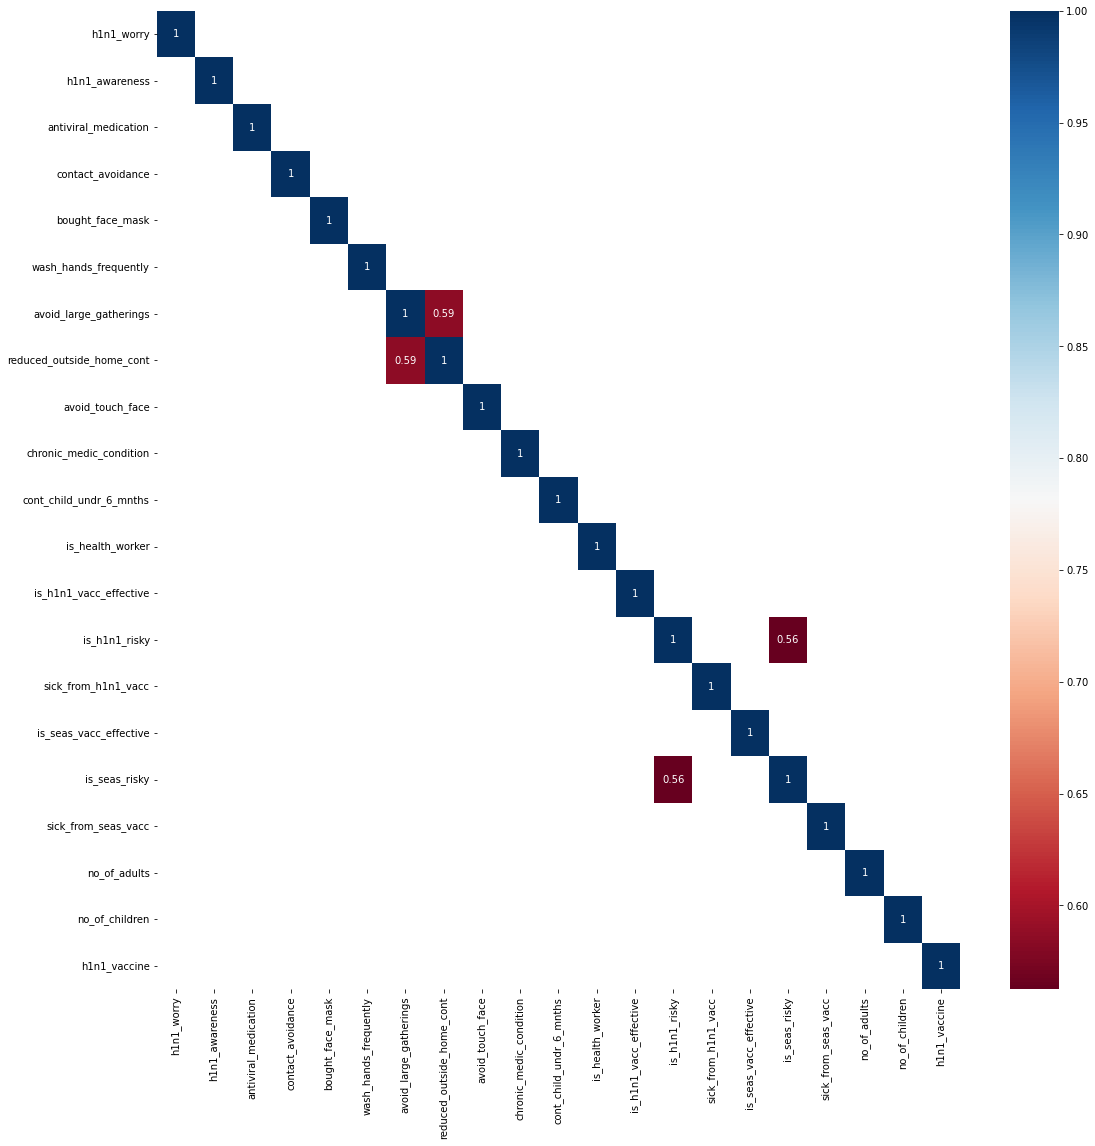

In [44]:
corr = df.corr()
plt.figure(figsize=(18,18))

sns.heatmap(corr[corr>0.5],annot = True,cmap = 'RdBu')
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score